In [1]:
import torch
import matplotlib.pyplot as plt
import regex as re

In [2]:
words = open('pokemon-list-en.txt', 'r').read().splitlines()

In [3]:
pattern = r"[\s'-\d]"
# Remove the specified characters from each string in the list
words = [re.sub(pattern, '', w) for w in words]

In [4]:
words[:10]

['abomasnow',
 'abra',
 'absol',
 'accelgor',
 'aegislash',
 'aerodactyl',
 'aggron',
 'aipom',
 'alakazam',
 'alomomola']

In [5]:
len(words)

721

In [6]:
min(len(w) for w in words)

3

In [7]:
max(len(w) for w in words)

11

In [8]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [9]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('e', '<E>'), 107),
 (('<S>', 's'), 103),
 (('a', 'r'), 88),
 (('o', 'n'), 74),
 (('n', '<E>'), 74),
 (('a', 'n'), 70),
 (('i', 'n'), 68),
 (('r', 'a'), 66),
 (('l', 'e'), 65),
 (('a', '<E>'), 64),
 (('r', '<E>'), 61),
 (('r', 'o'), 60),
 (('<S>', 'm'), 59),
 (('<S>', 'c'), 55),
 (('o', 'r'), 54),
 (('e', 'l'), 53),
 (('e', 'r'), 52),
 (('l', 'i'), 52),
 (('s', '<E>'), 50),
 (('t', '<E>'), 50),
 (('<S>', 'p'), 48),
 (('l', 'a'), 47),
 (('<S>', 'g'), 47),
 (('c', 'h'), 46),
 (('m', 'a'), 45),
 (('i', 'l'), 43),
 (('r', 'i'), 42),
 (('t', 'a'), 41),
 (('<S>', 'd'), 41),
 (('r', 'e'), 40),
 (('u', 'r'), 39),
 (('<S>', 'b'), 39),
 (('y', '<E>'), 39),
 (('i', 't'), 37),
 (('o', '<E>'), 37),
 (('<S>', 't'), 37),
 (('l', 'o'), 36),
 (('t', 'o'), 36),
 (('d', 'o'), 35),
 (('l', '<E>'), 34),
 (('g', 'o'), 34),
 (('<S>', 'l'), 34),
 (('<S>', 'a'), 33),
 (('o', 'l'), 33),
 (('o', 'o'), 33),
 (('n', 'e'), 33),
 (('a', 't'), 33),
 (('p', 'i'), 32),
 (('a', 's'), 31),
 (('s', 'h'), 31),
 (('u', 'n

In [10]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
#stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [11]:
# construct bigram count array
N = torch.zeros((30,30))

In [12]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [13]:
itos

{1: '.',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'j',
 12: 'k',
 13: 'l',
 14: 'm',
 15: 'n',
 16: 'o',
 17: 'p',
 18: 'q',
 19: 'r',
 20: 's',
 21: 't',
 22: 'u',
 23: 'v',
 24: 'w',
 25: 'x',
 26: 'y',
 27: 'z',
 28: 'é',
 29: '♂'}

..
.a
.b
.c
.d
.e
.f
.g
.h
.i
.j
.k
.l
.m
.n
.o
.p
.q
.r
.s
.t
.u
.v
.w
.x
.y
.z
.é
.♂
a.
aa
ab
ac
ad
ae
af
ag
ah
ai
aj
ak
al
am
an
ao
ap
aq
ar
as
at
au
av
aw
ax
ay
az
aé
a♂
b.
ba
bb
bc
bd
be
bf
bg
bh
bi
bj
bk
bl
bm
bn
bo
bp
bq
br
bs
bt
bu
bv
bw
bx
by
bz
bé
b♂
c.
ca
cb
cc
cd
ce
cf
cg
ch
ci
cj
ck
cl
cm
cn
co
cp
cq
cr
cs
ct
cu
cv
cw
cx
cy
cz
cé
c♂
d.
da
db
dc
dd
de
df
dg
dh
di
dj
dk
dl
dm
dn
do
dp
dq
dr
ds
dt
du
dv
dw
dx
dy
dz
dé
d♂
e.
ea
eb
ec
ed
ee
ef
eg
eh
ei
ej
ek
el
em
en
eo
ep
eq
er
es
et
eu
ev
ew
ex
ey
ez
eé
e♂
f.
fa
fb
fc
fd
fe
ff
fg
fh
fi
fj
fk
fl
fm
fn
fo
fp
fq
fr
fs
ft
fu
fv
fw
fx
fy
fz
fé
f♂
g.
ga
gb
gc
gd
ge
gf
gg
gh
gi
gj
gk
gl
gm
gn
go
gp
gq
gr
gs
gt
gu
gv
gw
gx
gy
gz
gé
g♂
h.
ha
hb
hc
hd
he
hf
hg
hh
hi
hj
hk
hl
hm
hn
ho
hp
hq
hr
hs
ht
hu
hv
hw
hx
hy
hz
hé
h♂
i.
ia
ib
ic
id
ie
if
ig
ih
ii
ij
ik
il
im
in
io
ip
iq
ir
is
it
iu
iv
iw
ix
iy
iz
ié
i♂
j.
ja
jb
jc
jd
je
jf
jg
jh
ji
jj
jk
jl
jm
jn
jo
jp
jq
jr
js
jt
ju
jv
jw
jx
jy
jz
jé
j♂
k.
ka
kb
kc
kd
ke
kf
kg
kh
ki
kj
kk
kl
km
k

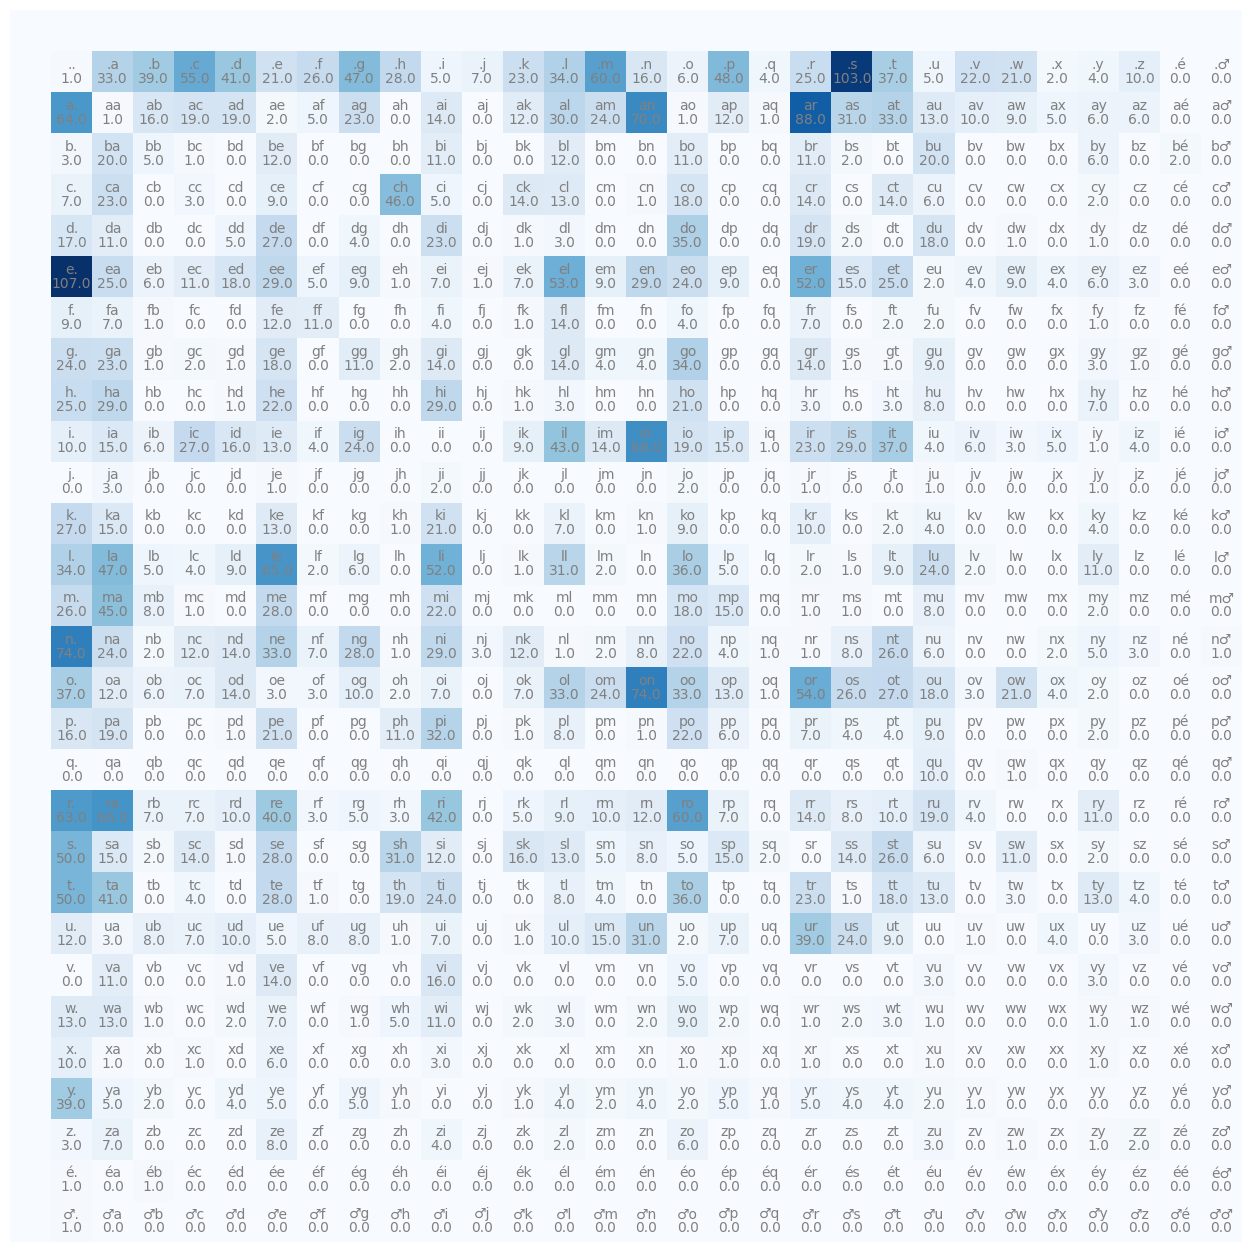

In [14]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(1,30):
    for j in range(1,30):
        chstr = itos[i] + itos[j]
        print(chstr)
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [15]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [19]:
g = torch.Generator().manual_seed(123)

for i in range(10):
  
  out = []
  ix = 1
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 1:
      break
  print(''.join(out))

sckolgairohi.
sanil.
enecamce.
cuchdercla.
g.
som.
gleoddoy.
se.
tyt.
lipamonegitrpa.


In [21]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n=}')

log_likelihood=tensor(-15934.4209)
nll=tensor(15934.4209)
nll/n=tensor(2.6325)
